<a href="https://colab.research.google.com/github/andrade-adsf/sales_analysis/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real world sales data

This is a study based on Keith Galli video "[Solving real world data science tasks with Python Pandas](https://youtu.be/eMOA1pPVUc4)" wich can be founded on his [Youtube Channel](https://www.youtube.com/channel/UCq6XkhO5SZ66N04IcPbqNcw).

All data was provided by him and can be found on the description of the video or on his Github.

Please feel free to send me feedbacks, you can find me on:

linkedin: https://www.linkedin.com/in/ads-felipe/

github: https://github.com/andrade-adsf

# Setup work enviroment

I'm just importing libraries, loading data and updating and setting up matplotlib on this part, feel free to jump to the interesting one.

In [1]:
!pip install matplotlib --upgrade

     |████████████████████████████████| 11.2 MB 8.4 MB/s 
     |████████████████████████████████| 899 kB 36.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
# import pandas
import pandas as pd

# import graph libs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# import num lib
import numpy as np

# import datetime librarie
from datetime import datetime as dt

# import libraries to count pairs on a list
from itertools import combinations
from collections import Counter

# configurar a visualização
%config InlineBackend.figure_format = 'svg' # melhorar a resolução das imagens, figura vetorial

# Data Manipulation

This data was on several excel files wich I concanate to create `all_data` data frame, you can find the excel files on my github.

Continuing the preparation work, here I'm preparing the data to be analised later.

In [2]:
path = "https://raw.githubusercontent.com/andrade-adsf/sales_analysis/main/all_data.csv" # set data path
all_data = pd.read_csv(path, engine = 'python') # read csv

## Data type

This is the data types on my dataframe, I have some work to do with it in order to be more produtive.

In [3]:
all_data.info() # check  dtype of columns on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Convert datetime

In [4]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], infer_datetime_format=True, errors='coerce') # convert Order Date from string to datetime

### Missing data

As all the missing data is a complete blank row I cannot take any info from them, so for this datafrime all will exclude all null values from the dataframe

In [5]:
# show percentage of data missing
(((all_data.isna().sum())/all_data.shape[0])*100)

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.481670
Purchase Address    0.291678
dtype: float64

In [6]:
# drop missing data
all_data.dropna(inplace=True)

### Convert str to int/float

In [7]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # convert to float
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # convert to int

### Result

In [8]:
all_data.info() # show dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


## Create sales column

Sales columns will be worth it since I just have `Price Each` on the dataframe, and it represents the price of the product itself not considering the `Quantity Ordered`

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] # create a new column sales with the value of each order
all_data.head() # show new df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


## Create Street, City and State columns

In [10]:
all_data[['Street', 'City', 'State']] = all_data['Purchase Address'].str.split(',', expand=True) # split Purchase address into 3 columns
all_data['Street'] = all_data['Street'].str.strip() # clean spaces on start and end of Street names
all_data['City'] = all_data['City'].str.strip() # clean spaces on start and end of City names
all_data['State'] = all_data['State'].str.strip() # clean spaces on start and end of State names
all_data['State'] = all_data['State'].str[:2] # Keep only the two letter from the states

all_data.head() # show new df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Street,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,917 1st St,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,682 Chestnut St,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,669 Spruce St,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,669 Spruce St,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,333 8th St,Los Angeles,CA


## Create new dataframes from the original one

### sales_month

In [11]:
sales_month = all_data.groupby(all_data['Order Date'].dt.to_period('M')).sum()[['Sales']] # sales summed by month period

### sales_city

In [12]:
sales_city = all_data.groupby(['City', 'State']).sum()[['Sales']] # sales summed by city
sales_citystate = sales_city.reset_index() # city state not indexed
sales_citystate['City'] = sales_citystate['City'] + ', ' + sales_citystate['State'] # city state on same column
sales_citystate.drop('State', axis = 1, inplace=True) # drop state column

### sales_time 

In [13]:
sales_time = all_data[['Order Date', 'Sales']] # creating a different dataframe with the data I need
sales_time['Hour'] = sales_time['Order Date'].dt.hour # creating a column with just the hours
sales_time_sum = sales_time.groupby('Hour').sum()[['Sales']] # sum and grouping by hours
sales_time_count = sales_time.groupby('Hour').count()[['Sales']] # count and grouping by hours

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### sold_together

In [14]:
not_single_purchase = all_data[all_data['Order ID'].duplicated(keep=False)] # keep only duplicated order id
not_single_purchase['Product Grouped'] = not_single_purchase.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # create a colum with single row for each order
sold_together = not_single_purchase[['Order ID', 'Product Grouped']].drop_duplicates() # delete duplicated rows

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
count = Counter() # list to manipulate

# combine product grouped column on a list
for row in sold_together['Product Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

# count pairs
for key, value in count.most_common(10):
  print(key, value)

together = dict(count.most_common(3)) # save Counter as a dict
df_together = pd.DataFrame.from_dict(together, orient='index').reset_index() # read new dict as dataframe
df_together.rename(columns={'index':'Product', 0:'qt'}, inplace=True) # rename columns
df_together_split = pd.DataFrame(df_together['Product'].tolist(), columns=['Product 1', 'Product 2']) # separate column tuple as columns for each item
df_together = pd.concat([df_together, df_together_split], axis=1) # join new columns on df
df_together.drop('Product', axis=1, inplace=True) # drop column with products tuple
df_together['Products'] = df_together['Product 1'] + ' + ' + df_together['Product 2'] # create new column with pair products on a string
df_together.drop(['Product 1', 'Product 2'], axis=1, inplace=True) # drop product 1, product 2 columns

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### sold_most

In [16]:
sold_most = all_data.groupby('Product').sum()[['Quantity Ordered', 'Price Each']].nlargest(5,'Quantity Ordered').reset_index() # save top 5 most sold products on a variable
sold_most_norm = (sold_most - sold_most.mean()*-1) / sold_most.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


# Def Function

This is a function I created to annotate on bar charts, I believe it is much more readable with the numbers on the bar instead of having it on the labels on the left.

In [17]:
# create function to annotate label on the bars of the chart
def autolabel(rects, x, y, size, float=True):
    '''
    Identify values and create an annotation with the same on top of each bar of
    the chart. Also abreviate the number if is higher than one million.
    :param rects: insert the variable with chart rectangles.
    :param x: change position based on x value.
    :param y: change position based on y value.
    :param size: change text size.
    :param float: altera a exibição do número caso seja float. default = True
    '''
    for rect in rects: # loop chart rectangles
        height = rect.get_height() # save rectangle rect on a variable
        if height > 400000: # abreviate large numbers
          ann = height/1000000
        else: # do nto abreviate if not large
          ann = height
        if float == True: 
          ax.annotate(
                      f"{ann:,.2f} M", # anottate height on rectangle M can be a string to inset next to it
                      xy=(rect.get_x() + rect.get_width(),  height), # anottation position
                      xytext=(x,y),  # micro adjustment on annotation position can be passed as argument
                      textcoords="offset points", # position
                      ha='center', # position
                      va='bottom', # position
                      fontsize=size, # fontsize
                      color="white", # color
                      )
        else:
          ax.annotate(
                      f"{ann}", # anottate height on rectangle M can be a string to inset next to it
                      xy=(rect.get_x() + rect.get_width(),  height), # anottation position
                      xytext=(x,y),  # micro adjustment on annotation position can be passed as argument
                      textcoords="offset points", # position
                      ha='center', # position
                      va='bottom', # position 
                      fontsize=size, # fontsize
                      color="white", # color
                      )

# Answering some questions.

This is the start of the fun part! With all the work done on the data I can start to make some questions and try to answer them. Let's see what I can do with it.

# What was the best month for sales? And how much was earned that month?

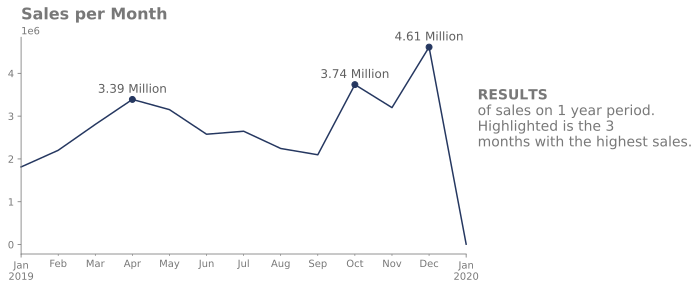

In [18]:
#@title
# plot
fig, ax = plt.subplots() # set figure and axis
sales_month.plot(kind='line', ax=ax, figsize=(8,4), # plot
                 color='#253760', # color of the line and markers
                 marker='o', markevery=[3, 9, 11], clip_on=False) # set markers

# remove corners
ax.spines['right'].set_visible(False) # remove right corner
ax.spines['top'].set_visible(False) # remove top corner

# set corners color
ax.spines["bottom"].set_color('#787878') # set bottom color
ax.spines["left"].set_color('#787878') # set left color

# plotar título
ax.set_title('Sales per Month', # text
             loc='left', # position
             fontsize=16, # fontsize
             fontweight='bold', #fontweight
             color='#787878', # color
             pad=18) # distance from border to chart

# describing text 
fig.text(0.92, 0.5, # position
         "$\\bf{RESULTS}$\n"
         "of sales on 1 year period.\n"
         "Highlighted is the 3\n"
         "months with the highest sales."
         ,
         fontsize=14, # fontsize
         color='#787878') # color

# set label style
ax.set_xlabel('') # hide label name
ax.tick_params(colors='#787878', which='both') # change tick color

# remove legend
ax.get_legend().remove()

# change font style
plt.rcParams['font.family'] = 'sans-serif'

# annotation
for index, row in sales_month.nlargest(3,'Sales').iterrows(): # read each index row for top 3 sales_month
    ax.annotate(xy=(index, row['Sales']), xycoords='data', xytext=(0,10), textcoords='offset points',# positioning annotation
            color='#5e5e5e', # color
            text=f"{row['Sales']/1000000:.2f} Million", # annotation text
            fontsize=12, # fontsize
            horizontalalignment='center', # alignment
            verticalalignment='center') # alignment

plt.show()

The higher number on December definitevely is for Christmas sale, for October I believe is in preparation for thanksgiving, besides that I can see I high value on April too, I would like to have more data to guess if this is recurrent and if we can expect the sales on this month to be higher on every year.

# What city had the highest value of sales?

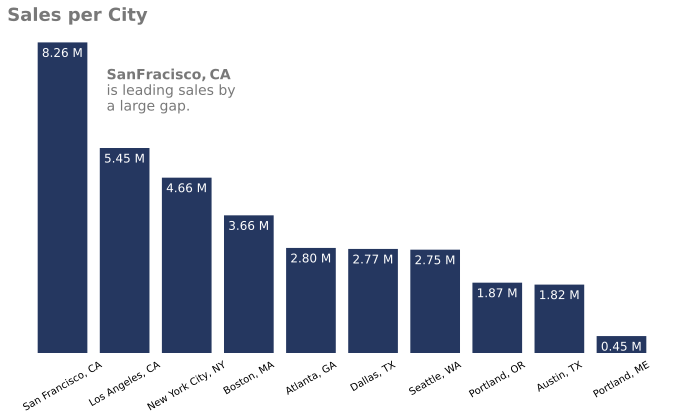

In [19]:
#@title
# plot 
fig, ax = plt.subplots(figsize=(12,6)) # set figure and axis
rect = ax.bar(sales_citystate.sort_values('Sales', ascending=False)['City'], sales_citystate.sort_values('Sales', ascending=False)['Sales'], width=0.8, color='#253760') # plot

# plotar título
ax.set_title('Sales per City', # text
             loc='left', # position
             fontsize=18, # fontsize
             fontweight='bold', #fontweight
             color='#787878') # color

# remove corners
ax.spines['right'].set_visible(False) # remove right corner
ax.spines['top'].set_visible(False) # remove top corner
ax.spines['bottom'].set_visible(False) # remove bottom corner
ax.spines['left'].set_visible(False) # remove left corner

# label rotation
plt.xticks(rotation=30)

# remove y ticks
plt.gca().axes.get_yaxis().set_visible(False)

# remove x ticks
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True)
          
# describing text 
fig.text(0.24, 0.65, # position
         "$\\bf{San Fracisco, CA}$\n"
         "is leading sales by\n"
         "a large gap.\n"
         ,
         fontsize=14, # fontsize
         color='#787878') # color
        
# plotar labels dentro das barras
autolabel(rect, -25, -17, 12)

San Francisco is leading by a large amount, I would like to check how ads are targeting, and how we are doing it, maybe that way I can have an idea on why we are getting more customers from there.

# What time should we display advertisements to maximize likelihood of customer buying product?

I want to compare number of sales and sales value to see if theres a big difference between the two.

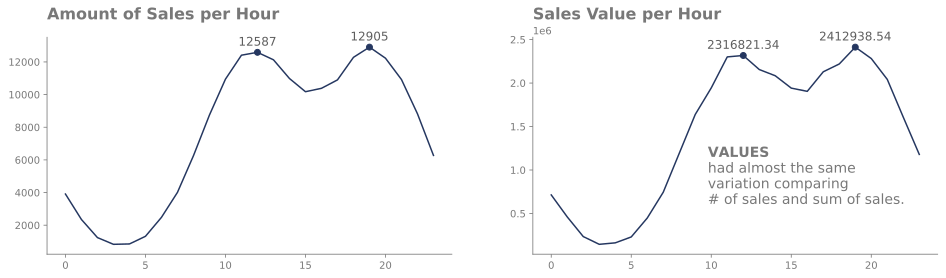

In [31]:
#@title
#plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4)) # set figure and axis
sales_time_count.plot(kind='line', ax=ax1, marker='o', markevery=[19, 12], clip_on=False, color='#253760') # plot left chart
sales_time_sum.plot(kind='line', ax=ax2, marker='o', markevery=[19, 12], clip_on=False, color='#253760') # plot right chart

# remove corners
ax1.spines['right'].set_visible(False) # remove ax1 right corner
ax1.spines['top'].set_visible(False) # remove ax1 top corner
ax2.spines['right'].set_visible(False) # remove ax2 right corner
ax2.spines['top'].set_visible(False) # remove ax2 top corner

# set corners color
ax1.spines["bottom"].set_color('#787878') # set ax1 bottom color
ax1.spines["left"].set_color('#787878') # set ax1 left color
ax2.spines["bottom"].set_color('#787878') # set ax1 bottom color
ax2.spines["left"].set_color('#787878') # set ax1 left color

# set label style
ax1.set_xlabel('') # hide ax1 label name
ax1.tick_params(colors='#787878', which='both') # change ax1 tick color
ax2.set_xlabel('') # hide ax2 label name
ax2.tick_params(colors='#787878', which='both') # change ax2 tick color

# remove legend
ax1.get_legend().remove()
ax2.get_legend().remove()

# plotar título ax1
ax1.set_title('Amount of Sales per Hour', # text
             loc='left', # position
             fontsize=16, # fontsize
             fontweight='bold', #fontweight
             color='#787878', # color
             pad=18) # distance from border to chart

# plotar título ax2
ax2.set_title('Sales Value per Hour', # text
             loc='left', # position
             fontsize=16, # fontsize
             fontweight='bold', #fontweight
             color='#787878', # color
             pad=18) # distance from border to chart

# describing text
fig.text(0.70, 0.3, # position
         "$\\bf{VALUES}$\n"
         "had almost the same\n"
         "variation comparing\n"
         "# of sales and sum of sales."
         ,
         fontsize=14, # fontsize
         color='#787878') # color

# annotation ax1
for index, row in sales_time_count.nlargest(2,'Sales').iterrows(): # read each index row for top 3 sales_month
      ax1.annotate(xy=(index, row['Sales']), xycoords='data', xytext=(0,10), textcoords='offset points',# positioning annotation
              color='#5e5e5e', # color
              text=row['Sales'], # annotation text
              fontsize=12, # fontsize
              horizontalalignment='center', # alignment
              verticalalignment='center') # alignment
# annotation ax2
for index, row in sales_time_sum.nlargest(2,'Sales').iterrows(): # read each index row for top 3 sales_month
      ax2.annotate(xy=(index, row['Sales']), xycoords='data', xytext=(0,10), textcoords='offset points',# positioning annotation
              color='#5e5e5e', # color
              text=row['Sales'], # annotation text
              fontsize=12, # fontsize
              horizontalalignment='center', # alignment
              verticalalignment='center') # alignment

# change font style
plt.rcParams['font.family'] = 'sans-serif'

So the chart shows how the number of sales and sales values have almost the same variation.

I like to think we have a increase of sales from the hour people start to prepare to go to work reaching the peak on lunch time them decreasing again and reaching other peak on the time people are leaving work, after that sales start to decline.

I believe it is better to target ads from 11:00 until 14:00, and them from 18:00 until 21:00.

# What products are most often sold together?

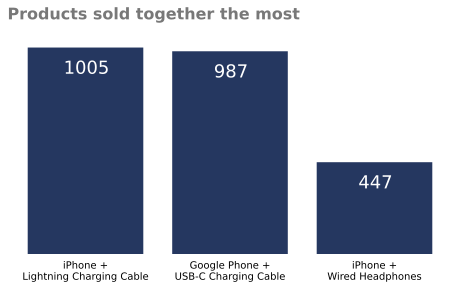

In [26]:
#@title
#plot
fig, ax = plt.subplots(figsize=(8,4)) # set figure and axis
#df_together.plot(kind='bar', ax=ax, color='#253760') # plot chart
rect = ax.bar(df_together['Products'], df_together['qt'], color='#253760') # plot

# set ticks
plt.xticks(ticks=(0, 1, 2), labels=('iPhone +\nLightning Charging Cable','Google Phone +\nUSB-C Charging Cable', 'iPhone +\nWired Headphones'), rotation=0)

# plotar título
ax.set_title('Products sold together the most', # text
             loc='left', # position
             fontsize=16, # fontsize
             fontweight='bold', #fontweight
             color='#787878', # color
             pad=18) # distance from border to chart

# remove corners
ax.spines['right'].set_visible(False) # remove right corner
ax.spines['top'].set_visible(False) # remove top corner
ax.spines['bottom'].set_visible(False) # remove bottom corner
ax.spines['left'].set_visible(False) # remove left corner

# remove y ticks
plt.gca().axes.get_yaxis().set_visible(False)

# remove x ticks
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True)

autolabel(rect, -57, -30, 18, float=False)

For me this chart shows the impact of apple removing the chareger from the box!

Jokes aside, people are concerned of buying a new phone and not getting a charger with it, and in half of this sales of not getting a headphone too. I believe it's a good strategy to try to create bundles with those itens giving a little discount if bought together.

# What product sold the most?

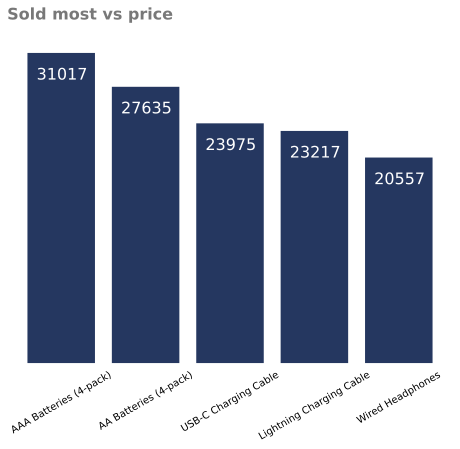

In [25]:
#@title
# plot
fig, ax = plt.subplots(figsize=(8,6)) # set figure and size
rect = ax.bar(sold_most['Product'], sold_most['Quantity Ordered'], color='#253760') # plot

# remove corners
ax.spines['right'].set_visible(False) # remove right corner
ax.spines['top'].set_visible(False) # remove top corner
ax.spines['bottom'].set_visible(False) # remove bottom corner
ax.spines['left'].set_visible(False) # remove left corner

# remove y ticks
plt.gca().axes.get_yaxis().set_visible(False)

plt.xticks(rotation=30)

# remove x ticks
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True)

# plotar título
ax.set_title('Sold most vs price', # text
             loc='left', # position
             fontsize=16, # fontsize
             fontweight='bold', #fontweight
             color='#787878', # color
             pad=18) # distance from border to chart

autolabel(rect, -33, -30, 16, float=False)

Besides the price of the batteries been lower than the charging cables and headphones, I believe this is due to the fact that I (and everyone) need to buy new batteries more often than new charging cables, so the most sold item is the one that needs to be replaced the most.

# Conclusion

This shop could focus ads from 11:00 until 14:00, and them from 18:00 until 21:00, showing bundles of most common sold together itens on the months that sales are linked to comemorative dates, and with more replacabe itens on the other dates.

I would also conduct a deep dive on sales per month to check if we can find any other trends and if the ones that is showing is not biased, and on sales per city to try to find out why we sell so much on San Francisco and if we can use the same strategie to increase sales on other cities.